In [4]:
# -*- coding: utf-8 -*-
import urllib2

import re
import string
import operator

#剔除常用字函数
def isCommon(ngram):
    commonWords = ["the", "be", "and", "of", "a", "in", "to", "have",
                   "it", "i", "that", "for", "you", "he", "with", "on", "do", "say",
                   "this", "they", "is", "an", "at", "but","we", "his", "from", "that",
                   "not", "by", "she", "or", "as", "what", "go", "their","can", "who",
                   "get", "if", "would", "her", "all", "my", "make", "about", "know",
                   "will","as", "up", "one", "time", "has", "been", "there", "year", "so",
                   "think", "when", "which", "them", "some", "me", "people", "take", "out",
                   "into", "just", "see", "him", "your", "come", "could", "now", "than",
                   "like", "other", "how", "then", "its", "our", "two", "more", "these",
                   "want", "way", "look", "first", "also", "new", "because", "day", "more",
                   "use", "no", "man", "find", "here", "thing", "give", "many", "well"]

    if ngram in commonWords:
        return True
    else:
        return False

def cleanText(input):
    input = re.sub('\n+', " ", input).lower() # 匹配换行用空格替换成空格
    input = re.sub('\[[0-9]*\]', "", input) # 剔除类似[1]这样的引用标记
    input = re.sub(' +', " ", input) #  把连续多个空格替换成一个空格
    input = bytes(input)#.encode('utf-8') # 把内容转换成utf-8格式以消除转义字符
    #input = input.decode("ascii", "ignore")
    return input

def cleanInput(input):
    input = cleanText(input)
    cleanInput = []
    input = input.split(' ') #以空格为分隔符，返回列表


    for item in input:
        item = item.strip(string.punctuation) # string.punctuation获取所有标点符号

        if len(item) > 1 or (item.lower() == 'a' or item.lower() == 'i'): #找出单词，包括i,a等单个单词
            cleanInput.append(item)
    return cleanInput

def getNgrams(input, n):
    input = cleanInput(input)

    output = {} # 构造字典
    for i in range(len(input)-n+1):
        ngramTemp = " ".join(input[i:i+n])#.encode('utf-8')

        if isCommon(ngramTemp.split()[0]) or isCommon(ngramTemp.split()[1]):
            pass
        else:
            if ngramTemp not in output: #词频统计
                output[ngramTemp] = 0 #典型的字典操作
            output[ngramTemp] += 1
    return output

#获取核心词在的句子
def getFirstSentenceContaining(ngram, content):
    #print(ngram)
    sentences = content.split(".")
    for sentence in sentences:
        if ngram in sentence:
            return sentence
    return ""

#方法一：对网页直接进行读取
content = urllib2.urlopen(urllib2.Request("http://pythonscraping.com/files/inaugurationSpeech.txt")).read()

#对本地文件的读取，测试时候用，因为无需联网
#content = open("1.txt").read()
ngrams = getNgrams(content, 2)
sortedNGrams = sorted(ngrams.items(), key = operator.itemgetter(1), reverse=True) # reverse=True 降序排列
print (sortedNGrams) 
for top3 in range(3):
    print "###"+getFirstSentenceContaining(sortedNGrams[top3][0],content.lower())+"###"

[('united states', 10), ('general government', 4), ('executive department', 4), ('legislative body', 3), ('mr jefferson', 3), ('same causes', 3), ('called upon', 3), ('chief magistrate', 3), ('whole country', 3), ('government should', 3), ('itself upon', 2), ('upon another', 2), ('pristine health', 2), ('state governments', 2), ('declare void', 2), ('both houses', 2), ('individual members', 2), ('several departments', 2), ('negative upon', 2), ('public money', 2), ('reserved powers', 2), ('strange indeed', 2), ('foreign relations', 2), ('exclusive metallic', 2), ('great increase', 2), ('federal government', 2), ('true spirit', 2), ('were made', 2), ('foreign aggression', 2), ('elective franchise', 2), ('used only', 2), ('american citizens', 2), ('state authorities', 2), ('veto power', 2), ('executive power', 2), ('respectively claim', 2), ('was intended', 2), ('propose amendments', 2), ('heretofore given', 2), ('genuine spirit', 2), ('was observable', 2), ('disputed points', 2), ('obse

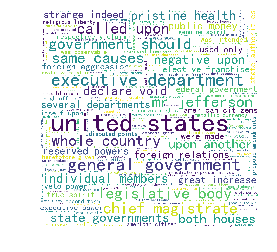

In [5]:
import numpy as np
import PIL.Image as Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt


# the font from github: https://github.com/adobe-fonts
font = r'simhei.ttf'
#coloring = np.array(Image.open("screenshot.png"))  # 遮罩层自己定义，可选自己的图片
wc = WordCloud(background_color="white",
               collocations=False, 
               font_path=font,
               width=1400, 
               height=1400,
               margin=2,
               ).generate_from_frequencies(dict(sortedNGrams))

# 这里采用了generate_from_frequencies(dict_)的方法，里面传入的值是{‘歌手1’:5,‘歌手2’:8,},分别是歌手及出现次数，其实和jieba分词
# 之后使用generate(text)是一个效果，只是这里的text已经被jieba封装成字典了

#image_colors = ImageColorGenerator(np.array(Image.open("screenshot.png")))
#plt.imshow(wc.recolor(color_func=image_colors))
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('save.png')  # 把词云保存下来 

In [6]:
sortedNGrams

[('united states', 10),
 ('general government', 4),
 ('executive department', 4),
 ('legislative body', 3),
 ('mr jefferson', 3),
 ('same causes', 3),
 ('called upon', 3),
 ('chief magistrate', 3),
 ('whole country', 3),
 ('government should', 3),
 ('itself upon', 2),
 ('upon another', 2),
 ('pristine health', 2),
 ('state governments', 2),
 ('declare void', 2),
 ('both houses', 2),
 ('individual members', 2),
 ('several departments', 2),
 ('negative upon', 2),
 ('public money', 2),
 ('reserved powers', 2),
 ('strange indeed', 2),
 ('foreign relations', 2),
 ('exclusive metallic', 2),
 ('great increase', 2),
 ('federal government', 2),
 ('true spirit', 2),
 ('were made', 2),
 ('foreign aggression', 2),
 ('elective franchise', 2),
 ('used only', 2),
 ('american citizens', 2),
 ('state authorities', 2),
 ('veto power', 2),
 ('executive power', 2),
 ('respectively claim', 2),
 ('was intended', 2),
 ('propose amendments', 2),
 ('heretofore given', 2),
 ('genuine spirit', 2),
 ('was observa

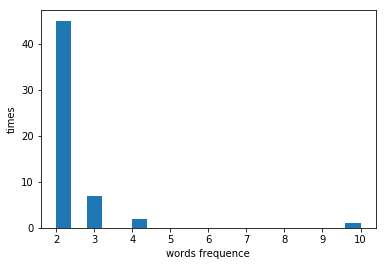

In [15]:
import matplotlib.pyplot as plt

plt.hist(filter(lambda y:y>1,map(lambda x:x[-1],sortedNGrams)),bins=20)  # 统计各个词频下种类的个数,这里使用filter去掉了出现一次的词了
plt.xlabel('words frequence')
plt.ylabel('times')
plt.show()

In [ ]:
# 更多统计等你自己好好玩